<a href="https://colab.research.google.com/github/honggi82/computer_vision/blob/main/CNN_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

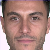

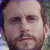

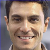

0
1
2


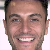

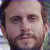

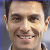

0
1
2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 3)            

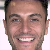

Prediction: [9.9999946e-01 3.0268200e-08 4.6060387e-07]
Real: [1. 0. 0.]


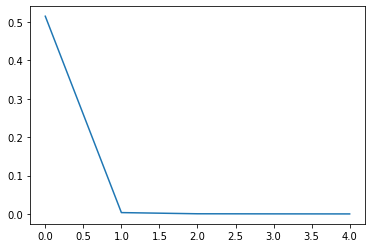

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, pooling, Flatten, Dense
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

# image data
train_X=[]; test_X=[]; train_Y=[]; test_Y=[];

for i in range(0,100):
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face0_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face1_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face2_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(2)

train_X=np.array(train_X)
train_Y=np.array(train_Y)

cv2_imshow(train_X[0]); cv2_imshow(train_X[1]); cv2_imshow(train_X[2]);
print(train_Y[0]); print(train_Y[1]); print(train_Y[2]);

for i in range(100,200):
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face0_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face1_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/Computer_Vision/faces/face2_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(2)
test_X=np.array(test_X)
test_Y=np.array(test_Y)
cv2_imshow(test_X[0]); cv2_imshow(test_X[1]); cv2_imshow(test_X[2]);
print(test_Y[0]); print(test_Y[1]); print(test_Y[2]);

# normalization
train_X = train_X.astype('float32')/255.0
test_X = test_X.astype('float32')/255.0

# One-Hot Encoding
train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)

# Model
model = Sequential([
    Conv2D(32, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(50,50,3)),
    pooling.MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), padding='same', strides=(1,1), activation='relu'),
    pooling.MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(3, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

# Training
history=model.fit(train_X, train_Y, batch_size=8, epochs=5)

# Testing
_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: ', accuracy)

# Plotting the loss
plt.plot(history.history['loss'], label='loss')

model.evaluate(test_X,test_Y)

trial=0
pred=model.predict(test_X)
cv2_imshow(test_X[trial]*255);
print("Prediction: " + str(pred[trial]))
print("Real: " + str(test_Y[trial]))